In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('Air_Quality_20260120.xlsx')

# Look at the first few rows
print(df.head())

# Check the shape (rows and columns)
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns")

# See all column names
print("\nColumn names:")
print(df.columns.tolist())

   Unique ID  Indicator ID                     Name Measure Measure Info  \
0     878218           386               Ozone (O3)    Mean          ppb   
1     876975           375   Nitrogen dioxide (NO2)    Mean          ppb   
2     876900           375   Nitrogen dioxide (NO2)    Mean          ppb   
3     877140           375   Nitrogen dioxide (NO2)    Mean          ppb   
4     874556           365  Fine particles (PM 2.5)    Mean       mcg/m3   

  Geo Type Name  Geo Join ID                        Geo Place Name  \
0         UHF42          402                           West Queens   
1         UHF42          501                         Port Richmond   
2         UHF42          207              East Flatbush - Flatbush   
3            CD          205  Fordham and University Heights (CD5)   
4         UHF34          410                             Rockaways   

   Time Period Start_Date  Data Value  Message  
0  Summer 2023 2023-06-01   34.365989      NaN  
1  Summer 2023 2023-06-0

In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types
print("\nData types:")
print(df.dtypes)

Missing values in each column:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           18862
dtype: int64

Data types:
Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID                int64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
Message                  float64
dtype: object


In [3]:
# See what pollutants we have
print("Pollutants in the dataset:")
print(df['Name'].unique())

# See the date range
print(f"\nDate range: {df['Start_Date'].min()} to {df['Start_Date'].max()}")

# Quick summary statistics
print("\nPollution levels summary:")
print(df.groupby('Name')['Data Value'].describe())

Pollutants in the dataset:
['Ozone (O3)' 'Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)'
 'Annual vehicle miles traveled (cars)' 'Annual vehicle miles traveled'
 'Annual vehicle miles traveled (trucks)' 'Deaths due to PM2.5'
 'Asthma emergency department visits due to PM2.5'
 'Asthma emergency departments visits due to Ozone'
 'Asthma hospitalizations due to Ozone'
 'Cardiac and respiratory deaths due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Respiratory hospitalizations due to PM2.5 (age 20+)'
 'Boiler Emissions- Total SO2 Emissions'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions' 'Outdoor Air Toxics - Benzene'
 'Outdoor Air Toxics - Formaldehyde']

Date range: 2005-01-01 00:00:00 to 2023-06-01 00:00:00

Pollution levels summary:
                                                     count       mean  \
Name                                                                    
Annual vehicle miles traveled                 

In [4]:
# Filter to just the main 3 pollutants
main_pollutants = ['Ozone (O3)', 'Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)']
df_clean = df[df['Name'].isin(main_pollutants)].copy()

print(f"Filtered data: {df_clean.shape[0]} rows")
print(f"\nPollutants included:")
print(df_clean['Name'].value_counts())

# Add Year column for easier analysis
df_clean['Year'] = df_clean['Start_Date'].dt.year

print(f"\nYears covered: {df_clean['Year'].min()} to {df_clean['Year'].max()}")

Filtered data: 14805 rows

Pollutants included:
Name
Nitrogen dioxide (NO2)     6345
Fine particles (PM 2.5)    6345
Ozone (O3)                 2115
Name: count, dtype: int64

Years covered: 2008 to 2023


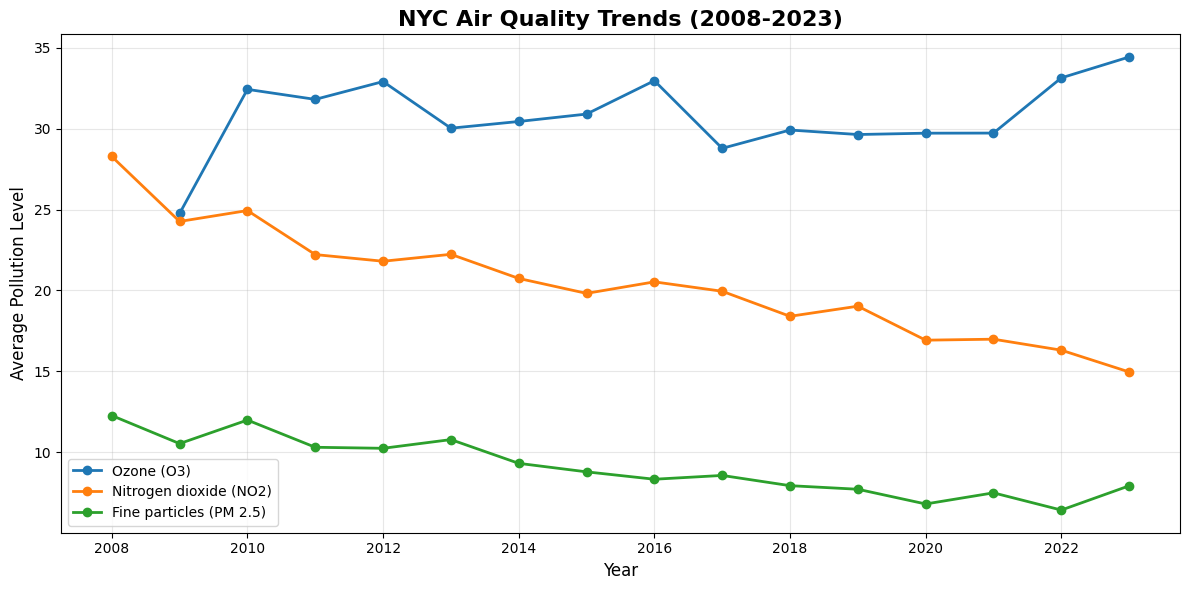

Chart created!


In [5]:
import matplotlib.pyplot as plt

# Calculate average pollution by year for each pollutant
yearly_avg = df_clean.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))

for pollutant in main_pollutants:
    data = yearly_avg[yearly_avg['Name'] == pollutant]
    plt.plot(data['Year'], data['Data Value'], marker='o', label=pollutant, linewidth=2)

plt.title('NYC Air Quality Trends (2008-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Pollution Level', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Chart created!")

In [6]:
# Focus on 2019-2021 to see COVID impact
covid_data = df_clean[df_clean['Year'].isin([2019, 2020, 2021])]

# Calculate average by year and pollutant
covid_avg = covid_data.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Show the numbers
print("Average Pollution Levels (2019-2021):")
for pollutant in main_pollutants:
    print(f"\n{pollutant}:")
    data = covid_avg[covid_avg['Name'] == pollutant]
    for _, row in data.iterrows():
        print(f"  {int(row['Year'])}: {row['Data Value']:.2f}")

    # Calculate percent change from 2019 to 2020
    val_2019 = data[data['Year'] == 2019]['Data Value'].values[0]
    val_2020 = data[data['Year'] == 2020]['Data Value'].values[0]
    percent_change = ((val_2020 - val_2019) / val_2019) * 100
    print(f"  Change 2019→2020: {percent_change:.1f}%")

Average Pollution Levels (2019-2021):

Ozone (O3):
  2019: 29.65
  2020: 29.73
  2021: 29.74
  Change 2019→2020: 0.3%

Nitrogen dioxide (NO2):
  2019: 19.03
  2020: 16.93
  2021: 16.99
  Change 2019→2020: -11.0%

Fine particles (PM 2.5):
  2019: 7.71
  2020: 6.80
  2021: 7.49
  Change 2019→2020: -11.8%


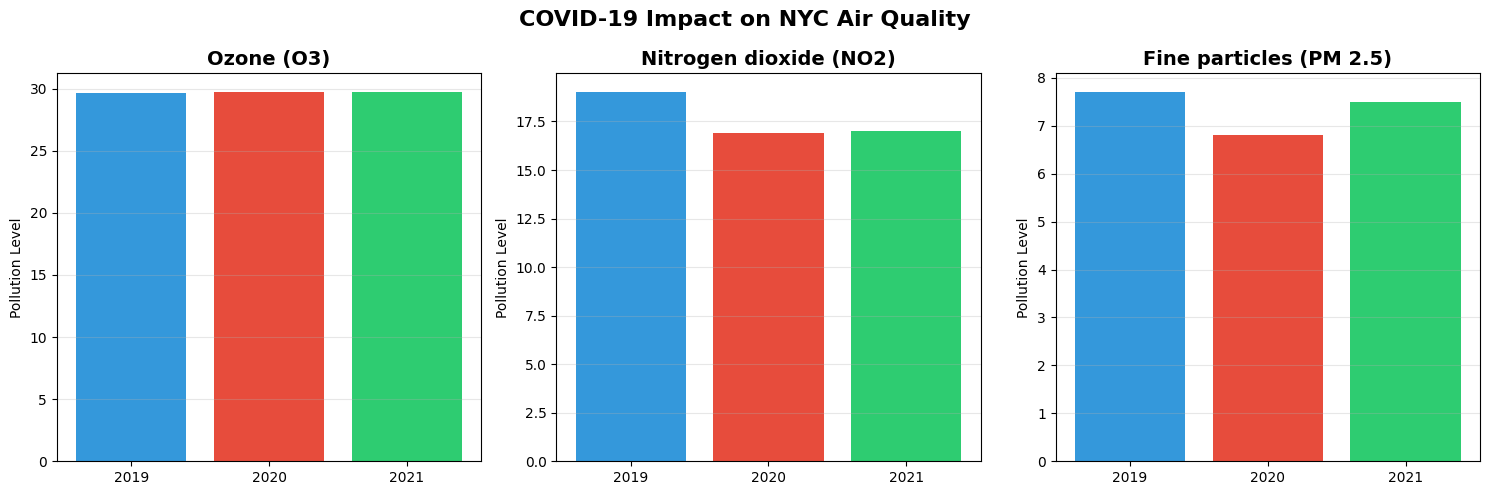

COVID impact chart created!


In [7]:
# Create bar chart comparing 2019 vs 2020
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, pollutant in enumerate(main_pollutants):
    data = covid_avg[covid_avg['Name'] == pollutant]

    axes[i].bar(['2019', '2020', '2021'], data['Data Value'],
                color=['#3498db', '#e74c3c', '#2ecc71'])
    axes[i].set_title(pollutant, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Pollution Level')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.suptitle('COVID-19 Impact on NYC Air Quality', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("COVID impact chart created!")

In [8]:
# Find the neighborhoods with best and worst air quality for each pollutant
# Using 2023 data (most recent)
recent_data = df_clean[df_clean['Year'] == 2023]

print("=" * 70)
print("NEIGHBORHOODS WITH WORST AND BEST AIR QUALITY (2023)")
print("=" * 70)

for pollutant in main_pollutants:
    pollutant_data = recent_data[recent_data['Name'] == pollutant]

    # Get average by neighborhood
    neighborhood_avg = pollutant_data.groupby('Geo Place Name')['Data Value'].mean().sort_values()

    print(f"\n{pollutant}:")
    print(f"\n  CLEANEST neighborhoods:")
    for i, (neighborhood, value) in enumerate(neighborhood_avg.head(3).items(), 1):
        print(f"    {i}. {neighborhood}: {value:.2f}")

    print(f"\n  MOST POLLUTED neighborhoods:")
    for i, (neighborhood, value) in enumerate(neighborhood_avg.tail(3).items(), 1):
        print(f"    {i}. {neighborhood}: {value:.2f}")

    print("-" * 70)

NEIGHBORHOODS WITH WORST AND BEST AIR QUALITY (2023)

Ozone (O3):

  CLEANEST neighborhoods:
    1. Chelsea - Clinton: 28.35
    2. Midtown (CD5): 28.43
    3. Clinton and Chelsea (CD4): 28.47

  MOST POLLUTED neighborhoods:
    1. Coney Island (CD13): 41.29
    2. Rockaways: 43.33
    3. Rockaway and Broad Channel (CD14): 43.40
----------------------------------------------------------------------

Nitrogen dioxide (NO2):

  CLEANEST neighborhoods:
    1. Rockaway and Broad Channel (CD14): 7.91
    2. Rockaways: 7.93
    3. Tottenville and Great Kills (CD3): 9.03

  MOST POLLUTED neighborhoods:
    1. Chelsea-Village: 22.19
    2. Chelsea - Clinton: 22.68
    3. Midtown (CD5): 24.17
----------------------------------------------------------------------

Fine particles (PM 2.5):

  CLEANEST neighborhoods:
    1. Rockaway and Broad Channel (CD14): 7.14
    2. Rockaways: 7.14
    3. Tottenville and Great Kills (CD3): 7.16

  MOST POLLUTED neighborhoods:
    1. Greenwich Village and Soho 